![Astrofisica Computacional](../../../logo.png)

---
##   `FITS` Images Composition I


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook we will use `astropy` to read a set of .fits files and display a composite version, based on information from different filters, of an astronomical image.

---

## 1. The .FITS files

In this notebook we will use the set of four .fits images of the galaxy M31 downloaded in the previous lesson of the portal
http://cdsportal.u-strasbg.fr/?target=andromeda

The four cfiles correspond to the photometric images with the [filters](https://en.wikipedia.org/wiki/Photometric_system): *i*, *r*, *g* and *u*,

m31_sdss_obs_flux_attcorr_nomask_i.fit \
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_g.fit\
m31_sdss_obs_flux_attcorr_nomask_u.fit

Now we will read the four files,

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

hduli = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_i.fit')
hdulr = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
hdulg = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_g.fit')
hdulu = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_u.fit')

i = hduli[0].data
r = hdulr[0].data
g = hdulg[0].data
u = hdulu[0].data

In [2]:
u.shape

(7400, 2300)

In [4]:
g

array([[-3.7973875e-01,  1.2473104e-01, -2.2378680e-01, ...,
         3.4684134e-01,  2.1196873e-01,  7.9194987e-03],
       [ 3.8202736e-01,  4.8359466e-01, -3.6116883e-01, ...,
         1.0672209e-01,  3.0894613e-01,  1.0265443e-01],
       [-1.4616922e-01, -9.0237431e-02, -2.2388013e-01, ...,
        -2.1899241e-01,  2.8873098e-01,  3.2044512e-01],
       ...,
       [ 9.6832520e-01, -5.7544220e-02, -1.9234440e-01, ...,
         1.3324526e-01,  2.3616114e-01, -1.2805840e-01],
       [-6.6223018e-02, -3.1077546e-01, -2.5476027e-01, ...,
        -1.2982987e-01,  1.0530822e-01,  1.8724188e-01],
       [ 8.6980647e-01, -2.0980015e-01,  7.6470774e-04, ...,
         1.6077057e+01,  5.2499861e-01, -3.7952598e-02]], dtype=float32)

## 2. Image RGB Composition

Now the [astropy.visualization.make_lupton_rgb( )](https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html) function will be used to perform RGB compositing using three of the images,

In [5]:
rgb_default = make_lupton_rgb(i.T, r.T, g.T)

In [7]:
rgb_default.shape


(2300, 7400, 3)

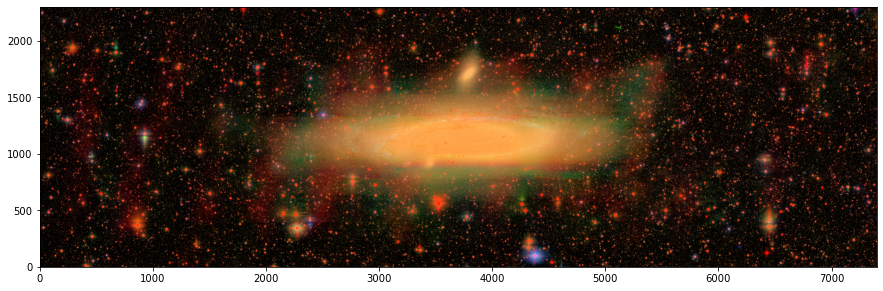

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()

The image can be enhanced by modifying some of the parameters of the `make_lupton_rgb()` function, such as: the `minimum`, the `stretch` and the `Q` factor.

Modifying the `minimum` changes the black level of the image, while the `stretch` and the `Q` factor change how the black and white levels are scaled.

Default values: \
minimum = 0.\
stretch= 5. (linearity ratio in the image)\
Q = 8 (asinh smoothing parameter)

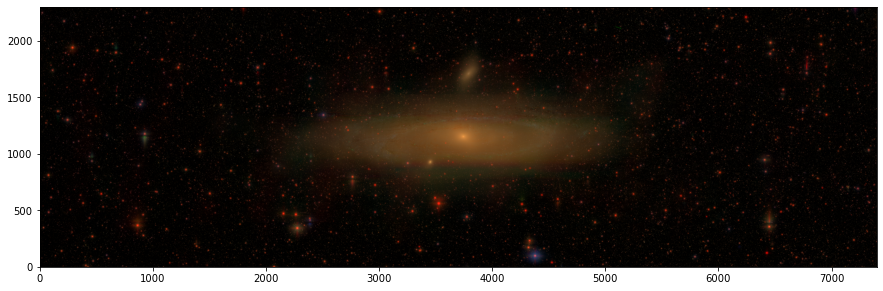

In [12]:
rgb_default = make_lupton_rgb(i.T, r.T, g.T,  stretch=40, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()

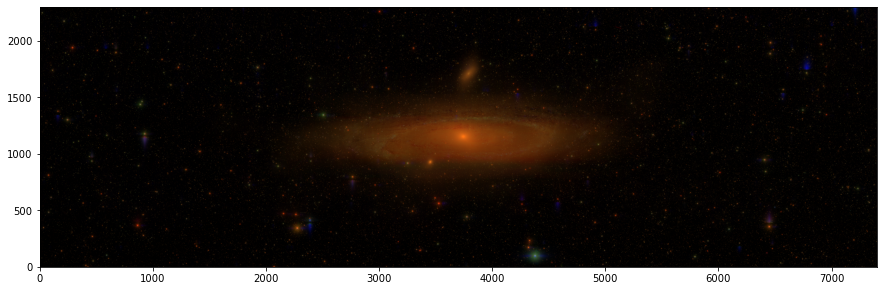

In [11]:
rgb_2 = make_lupton_rgb(r.T, g.T, u.T, stretch=50, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(rgb_2, origin='lower')
plt.show()

To understand what this compositing function does, note that the object created is an array in which each component is an array of the RGB values of the point to be rendered.

In [ ]:
rgb_default